In [2]:
import os
import scipy.io

# Define the path to the 3D annotations .mat file
mat_path = os.path.join("..", "data", "SUNRGBD", "SUNRGBDMeta3DBB_v2.mat")

# Load the .mat file using scipy
try:
    mat_data = scipy.io.loadmat(mat_path, struct_as_record=False, squeeze_me=True)
    print("✅ Loaded .mat file successfully.")
    print("Keys:", mat_data.keys())
except Exception as e:
    print("❌ Error loading .mat file:", e)


✅ Loaded .mat file successfully.
Keys: dict_keys(['__header__', '__version__', '__globals__', 'SUNRGBDMeta'])


In [3]:
# Extract the main annotation array
records = mat_data["SUNRGBDMeta"]

# Print total number of samples in the dataset
print("Total samples:", len(records))


Total samples: 10335


In [4]:
# Select the first sample to inspect
sample = records[0]  # You can try other indices too

# Display the available fields (attributes) of the record
print("Available fields in the sample:")
print(dir(sample))


Available fields in the sample:
['K', 'Rtilt', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'anno_extrinsics', 'depthname', 'depthpath', 'groundtruth3DBB', 'rgbname', 'rgbpath', 'sensorType', 'sequenceName', 'valid']


In [14]:
rgb_path = sample.rgbpath.replace('/n/fs/sun3d/data/SUNRGBD', dataset_root)
depth_path = sample.depthpath.replace('/n/fs/sun3d/data/SUNRGBD', dataset_root)

print("✅ RGB Exists:", os.path.exists(rgb_path))
print("✅ Depth Exists:", os.path.exists(depth_path))
print("RGB path:", rgb_path)
print("Depth path:", depth_path)


✅ RGB Exists: True
✅ Depth Exists: True
RGB path: ../data/SUNRGBD/kv2/kinect2data/000002_2014-05-26_14-23-37_260595134347_rgbf000103-resize/image/0000103.jpg
Depth path: ../data/SUNRGBD/kv2/kinect2data/000002_2014-05-26_14-23-37_260595134347_rgbf000103-resize/depth/0000103.png


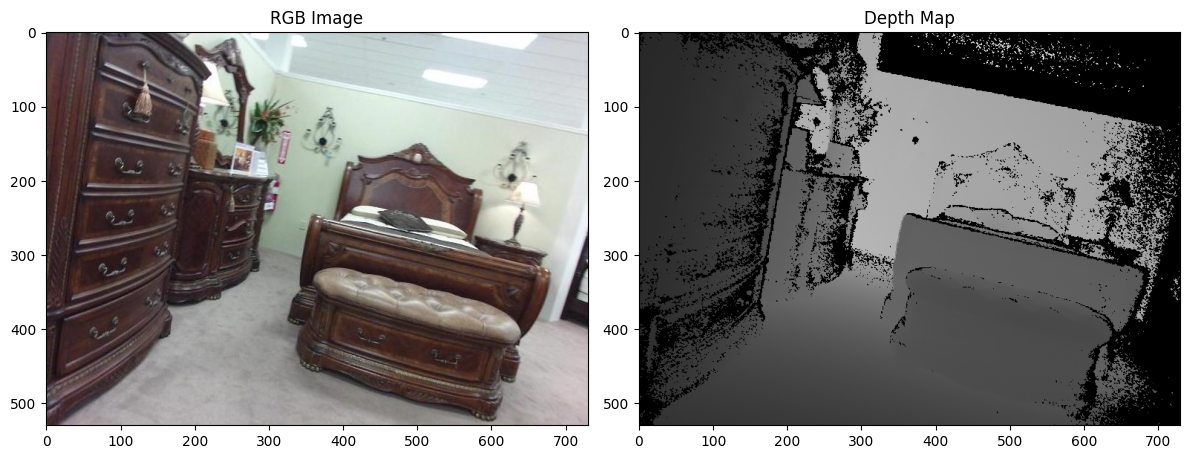

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load RGB image
rgb_img = Image.open(rgb_path)

# Load depth image as 2D array (16-bit)
depth_img = Image.open(depth_path)
depth_np = np.array(depth_img)

# Plot both images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("RGB Image")

plt.subplot(1, 2, 2)
plt.imshow(depth_np, cmap='gray')
plt.title("Depth Map")

plt.tight_layout()
plt.show()


In [17]:
import open3d as o3d
import numpy as np

# Access ground truth 3D bounding boxes from the sample
boxes = sample.groundtruth3DBB

print(f"✅ Total boxes: {len(boxes)}")

# Visualize the first bounding box
box = boxes[0]

# Get box center, basis (rotation), and size — using attribute access
basis = np.array(box.basis)       # 3x3 rotation matrix
centroid = np.array(box.centroid) # (x, y, z)
coeffs = np.array(box.coeffs)     # box size in x/y/z directions (half-size)

# Compute corner points
R = basis
extent = coeffs * 2
obb = o3d.geometry.OrientedBoundingBox(center=centroid, R=R, extent=extent)

# Visualize the box
o3d.visualization.draw_geometries([obb], window_name="3D Bounding Box")


✅ Total boxes: 6


In [ ]:

# List to store all OBBs
obb_list = []

for box in boxes:
    basis = np.array(box.basis)
    centroid = np.array(box.centroid)
    coeffs = np.array(box.coeffs)
    
    R = basis
    extent = coeffs * 2  # full size
    obb = o3d.geometry.OrientedBoundingBox(center=centroid, R=R, extent=extent)
    obb.color = (0, 1, 0)  # green box
    obb_list.append(obb)

# Visualize all boxes in one scene
o3d.visualization.draw_geometries(obb_list, window_name="All 3D Bounding Boxes")


: 